# Data Analysis - Question Formulation

I have chosen to analyze the titanic passenger data set. The main analysis I want to do is to find if the data suggest that there is a relationship between some of the variables tracked about passangers and their survival of the tragedy.

First I will do some exploration of the data so I can refine some specific question I want to answer. This will allow me to get aquaited with the data before I formulize my questions.


# Data Wrangling - Titanic

## Acquisition 

In [2]:
# Load the data from the file into a Pandas Dataframe
import pandas as pd
df = pd.read_csv('titanic_data.csv')


## Exploration

In [3]:
#Initially let's see the first few rows to get a sense of the data
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [14]:
#Let's make some initial counts of values present in columns to see if there is missing data

#Total Records according to the passanger ID
print "Total Records with ID: {}".format(df['PassengerId'].count())
# Total Records
print "Couunts for other columns"
df.count()

Total Records with ID: 891
Couunts for other columns


PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [21]:
#Check the values for columns that seem to be missing data
print "Possible values for the age"
print df['Age'].unique()

print "Possible values for the Cabin"
print df['Cabin'].unique()

print "Possible values for Embarked"
print df['Embarked'].unique()


Possible values for the age
[ 22.    38.    26.    35.      nan  54.     2.    27.    14.     4.    58.
  20.    39.    55.    31.    34.    15.    28.     8.    19.    40.    66.
  42.    21.    18.     3.     7.    49.    29.    65.    28.5    5.    11.
  45.    17.    32.    16.    25.     0.83  30.    33.    23.    24.    46.
  59.    71.    37.    47.    14.5   70.5   32.5   12.     9.    36.5   51.
  55.5   40.5   44.     1.    61.    56.    50.    36.    45.5   20.5   62.
  41.    52.    63.    23.5    0.92  43.    60.    10.    64.    13.    48.
   0.75  53.    57.    80.    70.    24.5    6.     0.67  30.5    0.42
  34.5   74.  ]
Possible values for the Cabin
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49' 'F4'
 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77' 'E67'
 'B94' 'C125' 'C99' 'C118' 'D

In [71]:
#Let's check unique values for other columns that appear to have a finite number of values
print "Possible values for the Class"
print df['Pclass'].unique()

print "Possible values for the Survived (I am assuming it is binary)"
print df['Survived'].unique()

print "Possible values for the Sex"
print df['Sex'].unique()


Possible values for the Class
[3 1 2]
Possible values for the Survived (I am assuming it is binary)
[0 1]
Possible values for the Sex
['male' 'female']


In [25]:
#Now let's just describe the data
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

# Question refinement based on exploration

In terms of mean, it makes sense to look at the Age, SibSp, Parch and Fare columns.

I find interesting that the ages range from 6 months to 80 years. Makes me wonder how the deads vs alive are distributed across age.

In terms of relationships. I was surprised to see that some had up to 8 siblings with them (I assume they were not spouses). And some had up to 6 children with them as well. Again, I think it will be interesting to know if people traveling with relatives had a higher or lower dead rate.

Fares don't tell me much by themselves, but I would like to see if peple paying higer fares or who were in a higher class were more likely to survive.

## Specific questions to answer:

1. I would assume young and elder people would have a higher chance to survive if they had priority to access lifeboats. Does the data suggest that people over 60 or under 20 had better survival numbers than the rest of passengers?

2. Was sex a factor in the survvival rate?

3. Were people with higher class more likely to suvive?

# Data analysis

## Question 1: Does the data suggest that people over 60 or under 20 had better survival numbers than the rest of passengers?

In [69]:
#Let's check the stats on both groups
df.groupby(['Survived'])['Age'].describe()

Survived       
0         count    424.000000
          mean      30.626179
          std       14.172110
          min        1.000000
          25%       21.000000
          50%       28.000000
          75%       39.000000
          max       74.000000
1         count    290.000000
          mean      28.343690
          std       14.950952
          min        0.420000
          25%       19.000000
          50%       28.000000
          75%       36.000000
          max       80.000000
dtype: float64

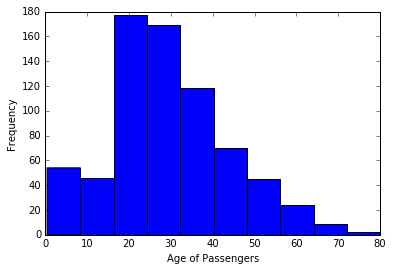

In [23]:
#Let's look at a histogram to get a sense of the passengers distribution by age
%matplotlib inline
#df.hist(column='Age')
ax = df["Age"].plot(kind='hist')
ax.set_xlabel("Age of Passengers")


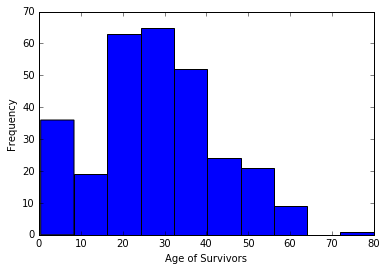

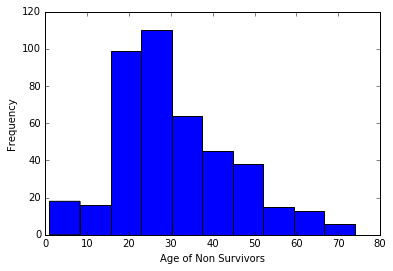

In [22]:
# Now let's grup by survival status and plot those histograms
#ax = df['Age'].plot(kind='hist', by=df['Survived'])
%matplotlib inline
import matplotlib.pyplot as plt
survivors = df[df['Survived'] == 1]
nonsurvivors = df[df['Survived'] == 0]

ax = survivors["Age"].plot(kind='hist')
ax.set_xlabel("Age of Survivors")

plt.figure()

ax = nonsurvivors["Age"].plot(kind='hist')
ax.set_xlabel("Age of Non Survivors")

## Conclusion: 

The mean would suggest that survivors are slightly younger than non-survivors.

The distribution of survivors vs non-survivors follow the same shape than the overall population. But, there seems to be some indication that among survivours the proportion of youner people is higher. Also the overall count of survivors in groups 0-10 and 11-20 are much higher than those of non-survivors. It does not seem to be the case for the elder, in which the numbers and proportions are more at the same level between the two groups.

## Question 2: Was sex a factor in the survival rate?

In [86]:
#Let's check the stats on both groups
print df.groupby(['Survived'])['Sex'].count()
df.groupby(['Survived'])['Sex'].describe()


Survived
0    549
1    342
Name: Sex, dtype: int64


Survived        
0         count        549
          unique         2
          top         male
          freq         468
1         count        342
          unique         2
          top       female
          freq         233
dtype: object

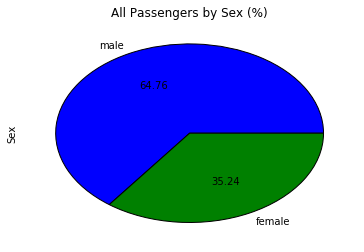

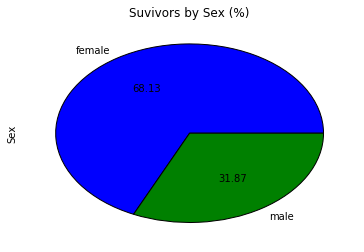

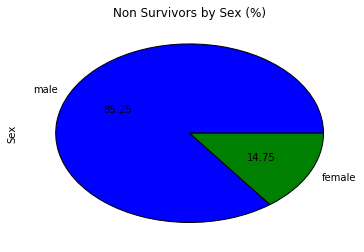

In [110]:
# Lets retrieve the data for each group a create a pie chart
%matplotlib inline
df.Sex.value_counts().plot.pie(autopct='%.2f', title="All Passengers by Sex (%)")
plt.figure()
survivors = df[df['Survived'] == 1]
nonsurvivors = df[df['Survived'] == 0]

survivors.Sex.value_counts().plot.pie(autopct='%.2f', title="Suvivors by Sex (%)")
plt.figure()
nonsurvivors.Sex.value_counts().plot.pie(autopct='%.2f', title="Non Survivors by Sex (%)")
plt.figure()

## Conclusion: 

By looking at the percentage of Males vs Females, we can see that among all passanger data, the males are predominant. They are about 64 percent of all passangers. However, looking at survivor data, 68% are women, while in non survivor data, women only account for 14%.

This suggests that women were more likely to survive the tragedy.

## Question 3: Were people with higher class more likely to suvive?

In [116]:
#Let's add a column that has string for class name
def numberToString(theclass):
    if(theclass == 3):
        return 'High'
    if(theclass == 2):
        return 'Medium'
    if(theclass == 1):
        return 'Low'
    return 'Unknown'
df['strClass'] = df['Pclass'].apply(numberToString)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare Cabin Embarked strClass  
0      0         A/5 21171   7.2500   NaN        S     High  
1      0          PC 17599  71.2833   C85        C      Low  
2      0  STON/O2. 3101282   7.9250   NaN        S     High  
3      0            113803  53.1000  C123        S      Low  
4      0            373450   8.0500   NaN        S     High

In [117]:
#Let's check the stats on both groups
print df.groupby(['Survived'])['strClass'].count()
df.groupby(['Survived'])['strClass'].describe()


Survived
0    549
1    342
Name: strClass, dtype: int64


Survived        
0         count      549
          unique       3
          top       High
          freq       372
1         count      342
          unique       3
          top        Low
          freq       136
dtype: object

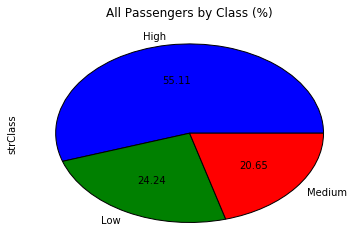

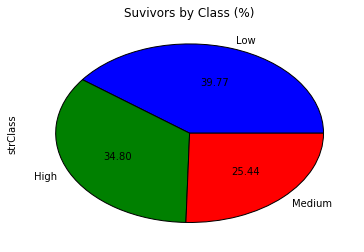

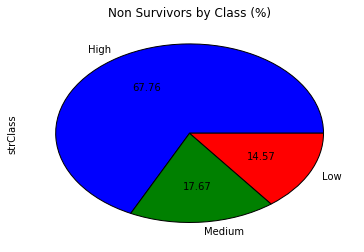

In [119]:
# Lets retrieve the data for each group a create a pie chart
%matplotlib inline
df.strClass.value_counts().plot.pie(autopct='%.2f', title="All Passengers by Class (%)")
plt.figure()
survivors = df[df['Survived'] == 1]
nonsurvivors = df[df['Survived'] == 0]

survivors.strClass.value_counts().plot.pie(autopct='%.2f', title="Suvivors by Class (%)")
plt.figure()
nonsurvivors.strClass.value_counts().plot.pie(autopct='%.2f', title="Non Survivors by Class (%)")
plt.figure()

## Conclusion

Among all passangers, those in High accounted for the majority at 55%. However by looking at the survivor data the Low class are the ones in the majority with almost 40%. While in the non survivor data high class passangers where the most with 67 percent. So I would think the data suggest that low class passengers had a good chance of surviving.

# Summary

Here we present the some of the numbers that help support the conclusions on the study

### Age as a factor for survival
- Average Age of survivors: 28.3
- Average Age of non-survivors: 30.6
- ---------
- Number of non-sruvivors less than 20 years old: 28
- Number of survivors less than 20 years old: 55

### Sex as a factor for survival

- Percentage of males in the sample: 64.76%
- Percentage of males among survivors: 31.87%
- Percentage of males among non-survivors: 85.25%
- ---------
- Percentage of females in the sample: 35.24%
- Percentage of females among survivors: 68.13%
- Percentage of females among non-survivors: 14.75%

### Class as a factor for survival

- Predominant class in the sample: High (55.11%)
- Predominant class among survivors: Low (39.77%)
- Predominant class among non-survivors: High (67.66%)







# Analysis Limitations

Although the findings of the presented analysis are very interesting and we can see some trends on the data, it is important to recognize the limitations of this study.

First and foremost, this study does not present any soft of rigorous statistical analysis. I do not have information about how this sample of the entire population of Titanic passengers was selected. Was it a random sample? 

Also we donâ€™t do statistical tests to prove the statistical significance in the data observations. We just look at the trend and make some conclusions based on those observations. 

Furthermore, in the case of Sex, there are some missing values. Excluding those entries from the data may allow us to proceed with the analysis, but it introduces even more uncertainty about how much we can draw conclusions.

Also, we are probably missing additional information about other variables that may have affected the survival of the passengers. Where in the ship where they located with respect to the deck and lifeboats. Were they awake or asleep? any others? some of these we will probably never know.
